## Transfer Learning Xception using Keras

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [7]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.resnet152V2 import ResNet152V2
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


## Importing weights of Xception

In [9]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
import tensorflow
xception =tensorflow.keras.applications.Xception(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [10]:
# don't train existing weights
for layer in xception.layers:
    layer.trainable = False

In [11]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

## Model using Transfer Learning

In [12]:
# our layers 
x = Flatten()(xception.output)

In [13]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=xception.input, outputs=prediction)

In [14]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

In [15]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


## Data Augmentation

In [16]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [18]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


## Model Fitting

In [19]:
# fit the model
# It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=40,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/40
61/61 [==============================] - 65s 1s/step - loss: 1.6464 - accuracy: 0.7724 - val_loss: 0.1954 - val_accuracy: 0.8889
Epoch 2/40
61/61 [==============================] - 61s 996ms/step - loss: 0.4907 - accuracy: 0.8924 - val_loss: 0.0701 - val_accuracy: 0.9444
Epoch 3/40
61/61 [==============================] - 66s 1s/step - loss: 0.5407 - accuracy: 0.9057 - val_loss: 0.2325 - val_accuracy: 0.8889
Epoch 4/40
61/61 [==============================] - 61s 1000ms/step - loss: 0.4717 - accuracy: 0.9088 - val_loss: 0.0942 - val_accuracy: 0.9444
Epoch 5/40
61/61 [==============================] - 66s 1s/step - loss: 0.3402 - accuracy: 0.9411 - val_loss: 0.2349 - val_accuracy: 0.8333
Epoch 6/40
61/61 [==============================] - 64s 1s/step - loss: 0.3603 - accuracy: 0.9252 - val_loss: 2.7805e-04 - val_accuracy: 1.0000
Epoch 7/40
61/61 [==============================] - 64s 1s/step - loss: 0

In [20]:
import matplotlib.pyplot as plt

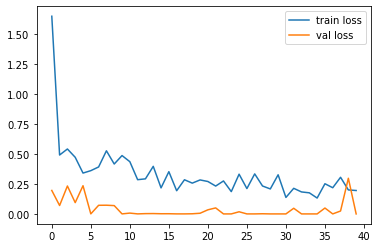

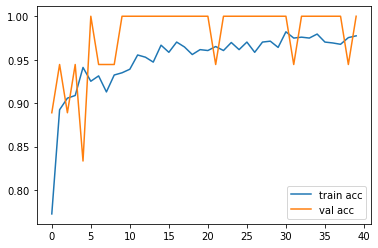

<Figure size 432x288 with 0 Axes>

In [21]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [22]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('model_xception.h5')

## Testing

In [18]:

y_pred = model.predict(test_set)


In [19]:
y_pred

array([[5.3846088e-29, 2.2531559e-23, 1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [2.1657728e-08, 1.2172376e-20, 1.0000000e+00, 1.5230057e-28],
       [4.8872598e-30, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 1.3303991e-33, 0.0000000e+00],
       [4.5714924e-16, 8.6781859e-11, 1.3235285e-09, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [5.4839473e-28, 1.0000000e+00, 3.3122518e-22, 6.6293510e-21],
       [1.0000000e+00, 5.0101860e-30, 0.0000000e+00, 0.0000000e+00],
       [7.8975147e-36, 2.7945514e-23, 1.0478895e-18, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.2099686e-36],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [5.2780553e-25, 1.6846226e-15, 1.0000000e+00, 1.5684442e-16],
       [0.0000000e+00, 3.1915728e-

In [20]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [21]:
y_pred

array([2, 1, 2, 2, 1, 0, 3, 1, 1, 0, 3, 1, 2, 2, 3, 2, 3, 3], dtype=int64)

## Model Loading and Prediction

In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [2]:
model=load_model('model_resnet50.h5')

In [39]:
img_data

array([[[[ 6.7060997e+01,  5.4221001e+01,  4.7320000e+01],
         [ 6.9060997e+01,  5.6221001e+01,  4.9320000e+01],
         [ 7.3060997e+01,  6.0221001e+01,  5.3320000e+01],
         ...,
         [ 7.4060997e+01,  5.6221001e+01,  4.6320000e+01],
         [ 5.5060997e+01,  3.7221001e+01,  2.7320000e+01],
         [ 4.1060997e+01,  2.3221001e+01,  1.3320000e+01]],

        [[ 7.5060997e+01,  6.2221001e+01,  5.5320000e+01],
         [ 7.8060997e+01,  6.5221001e+01,  5.8320000e+01],
         [ 8.1060997e+01,  6.8221001e+01,  6.1320000e+01],
         ...,
         [ 9.7060997e+01,  7.9221001e+01,  6.9320000e+01],
         [ 7.3060997e+01,  5.5221001e+01,  4.5320000e+01],
         [ 4.9060997e+01,  3.1221001e+01,  2.1320000e+01]],

        [[ 8.7060997e+01,  7.4221001e+01,  6.7320000e+01],
         [ 9.0060997e+01,  7.7221001e+01,  7.0320000e+01],
         [ 9.3060997e+01,  8.0221001e+01,  7.3320000e+01],
         ...,
         [ 1.0106100e+02,  8.3221001e+01,  7.3320000e+01],
         [

In [11]:
img=image.load_img('Datasets/Test/Coffee/download (2).jpg',target_size=(224,224))



In [12]:
x=image.img_to_array(img)
x

array([[[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [13]:
x.shape

(224, 224, 3)

In [14]:
x=x/255

In [15]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [16]:
model.predict(img_data)

array([[0.9745471, 0.0254529]], dtype=float32)

In [17]:
a=np.argmax(model.predict(img_data), axis=1)

In [102]:
a==1

array([ True])